<a href="https://colab.research.google.com/github/emelynfreire/CNNandHooks/blob/main/Tarefa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), Activation shape: torch.Size([1, 64, 112, 112])


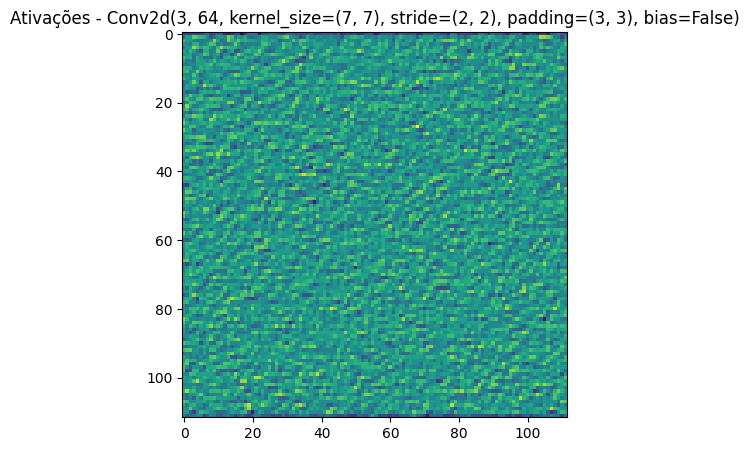

Layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 64, 56, 56])


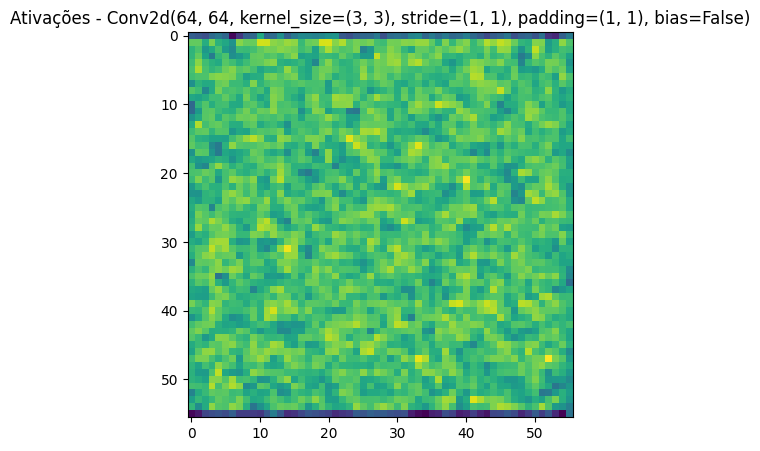

Layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 64, 56, 56])


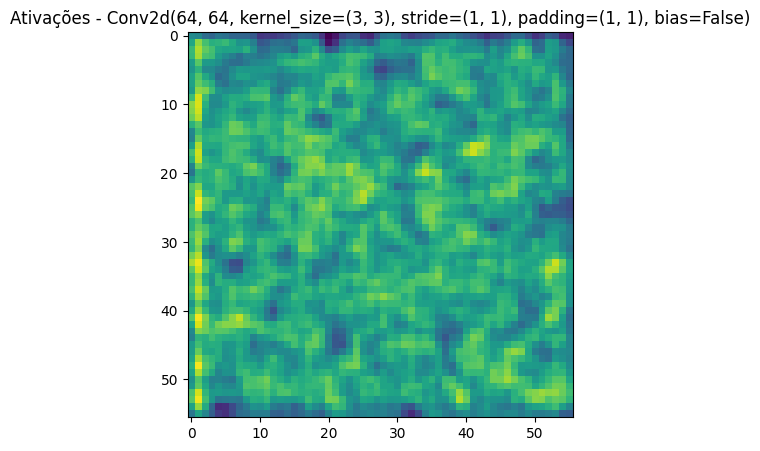

Layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 64, 56, 56])


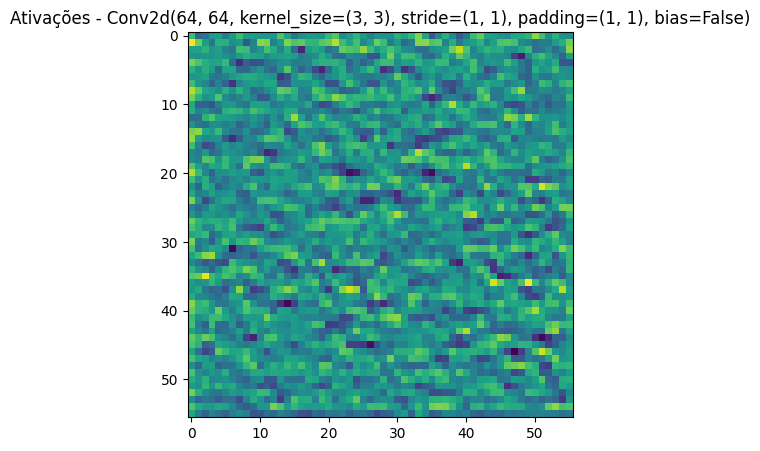

Layer: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 64, 56, 56])


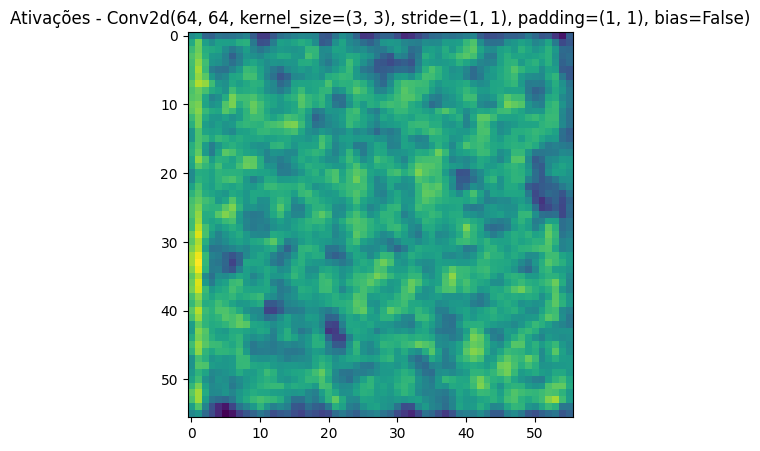

Layer: Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 128, 28, 28])


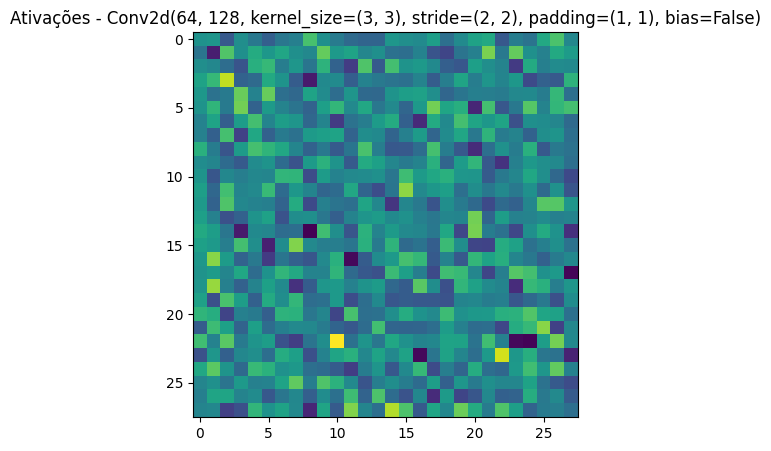

Layer: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 128, 28, 28])


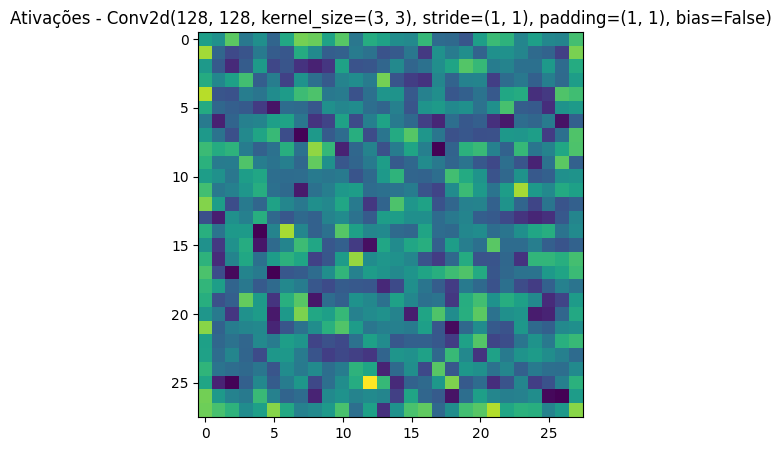

Layer: Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False), Activation shape: torch.Size([1, 128, 28, 28])


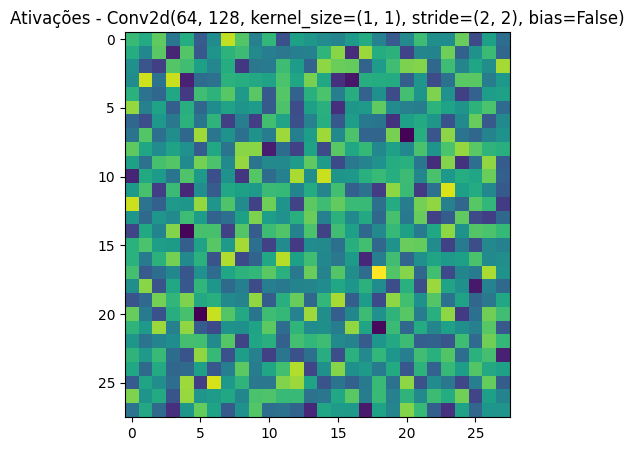

Layer: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 128, 28, 28])


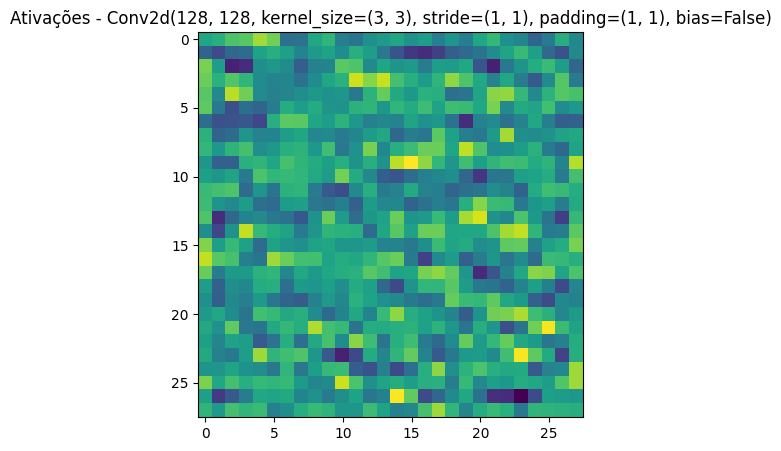

Layer: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 128, 28, 28])


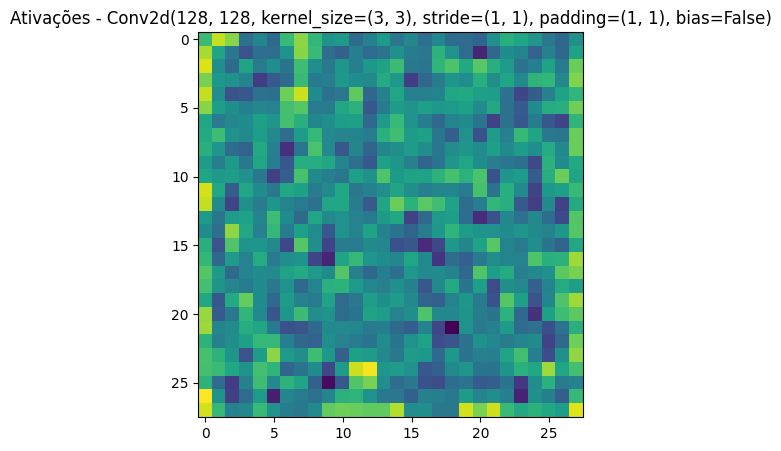

Layer: Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 256, 14, 14])


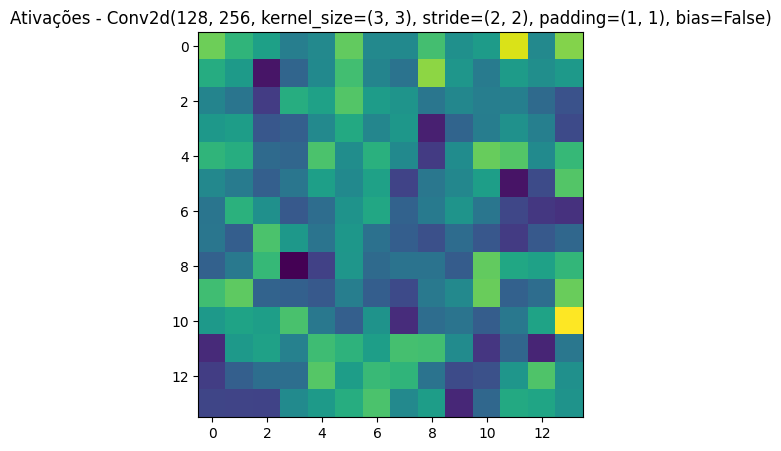

Layer: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 256, 14, 14])


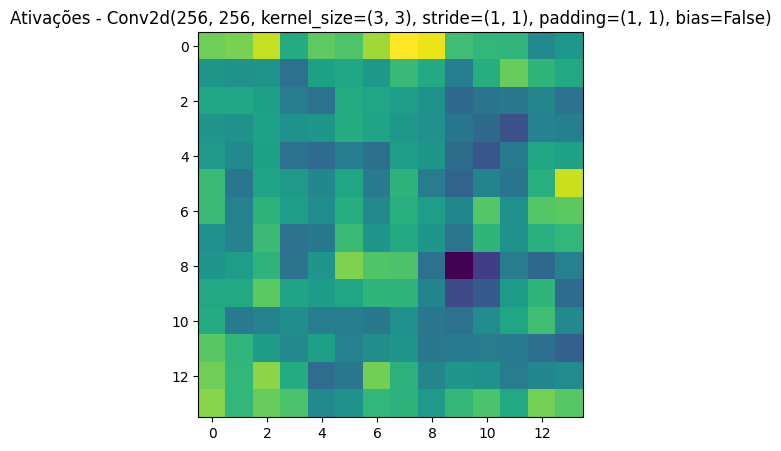

Layer: Conv2d(128, 256, kernel_size=(1, 1), stride=(2, 2), bias=False), Activation shape: torch.Size([1, 256, 14, 14])


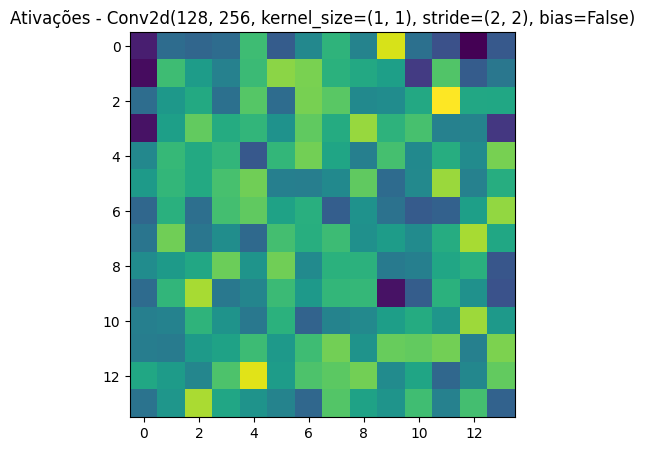

Layer: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 256, 14, 14])


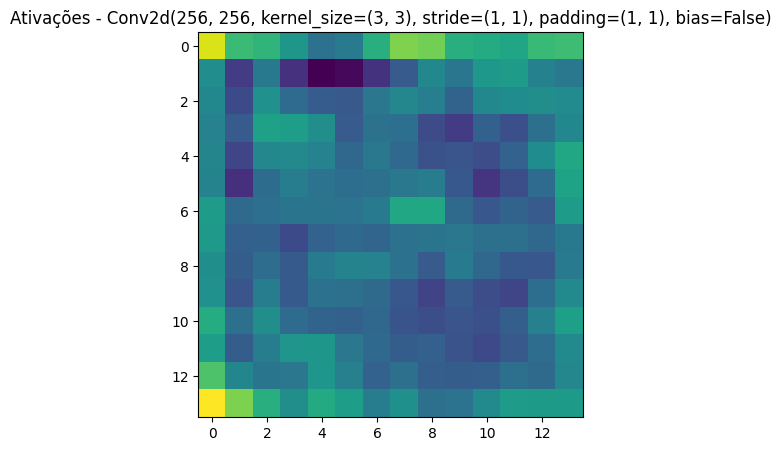

Layer: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 256, 14, 14])


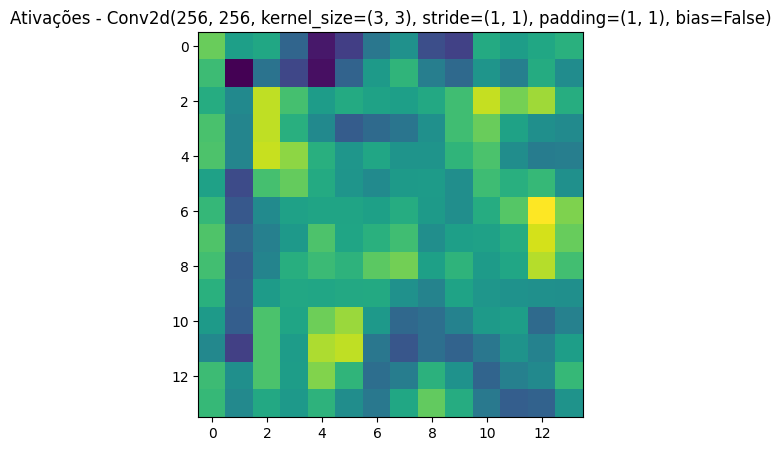

Layer: Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 512, 7, 7])


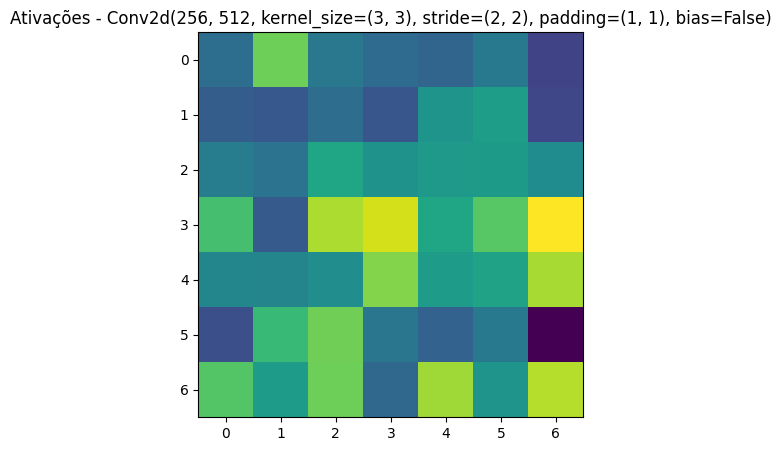

Layer: Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 512, 7, 7])


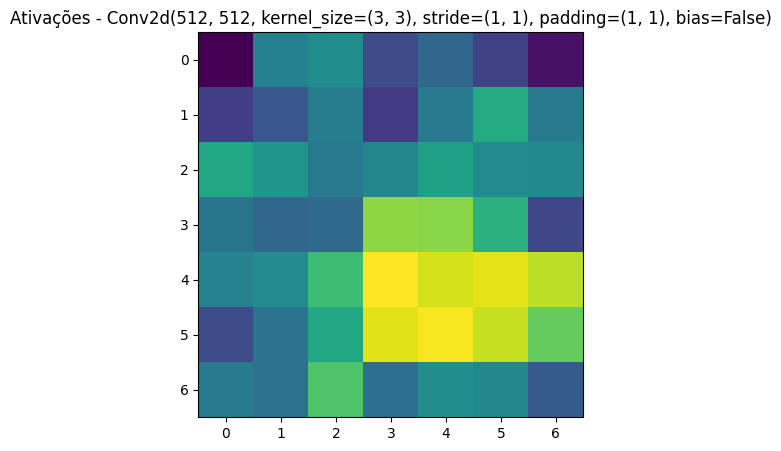

Layer: Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False), Activation shape: torch.Size([1, 512, 7, 7])


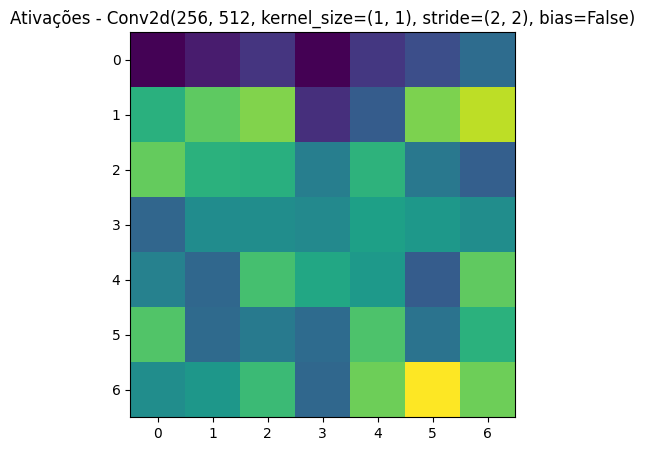

Layer: Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 512, 7, 7])


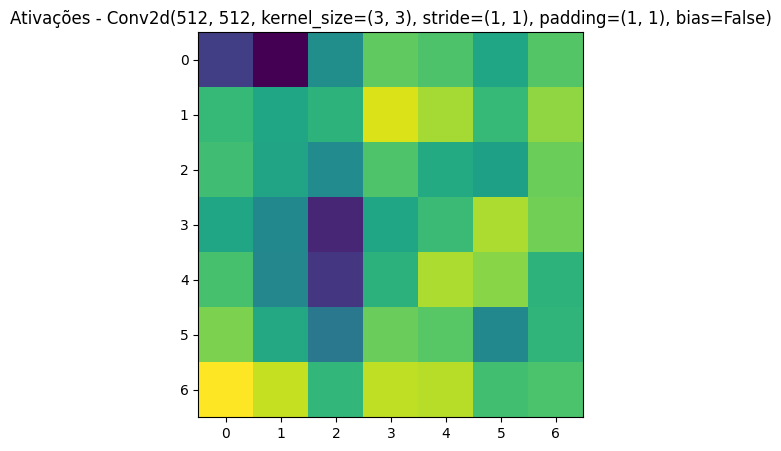

Layer: Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Activation shape: torch.Size([1, 512, 7, 7])


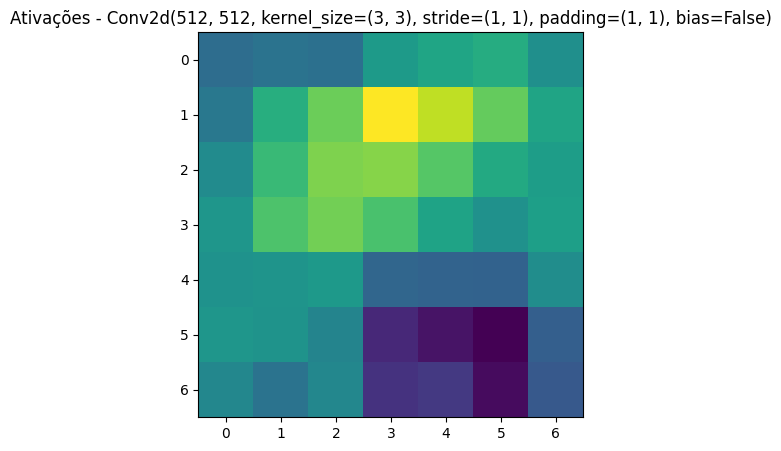

In [7]:
# 3.2 Implementação de Hooks
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

# Modelo pré-treinado
model = models.resnet18(pretrained=True)

# Dicionário para armazenar ativações
activations = {}

# Função de hook
def forward_hook(module, input, output):
    activations[module] = output

# Registrando hooks nas camadas convolucionais
for name, module in model.named_modules():
    if isinstance(module, nn.Conv2d):
        module.register_forward_hook(forward_hook)

# Exemplo de imagem de entrada
input_image = torch.rand(1, 3, 224, 224)

# Passando a imagem pelo modelo
_ = model(input_image)

# Visualizando as ativações
for layer, activation in activations.items():
    print(f"Layer: {layer}, Activation shape: {activation.shape}")
    # Exibindo as ativações da primeira imagem no batch
    plt.figure(figsize=(5, 5))
    plt.title(f"Ativações - {layer}")
    plt.imshow(activation[0, 0].detach().cpu(), cmap='viridis')  # Mostra o primeiro canal
    plt.show()


In [4]:
!pip install gtts

In [6]:
# 5. Geração de Podcast

from gtts import gTTS

# Texto para o podcast
script = """
Olá, bem-vindo ao nosso podcast sobre Redes Neurais Convolucionais! Eu sou o João.
E eu sou a Ana! Hoje vamos falar sobre CNNs, hooks no PyTorch e como tudo isso pode ser usado na prática.
...
"""

# Gerar o áudio
tts = gTTS(script, lang='pt-br')
tts.save("podcast_cnn_hooks.mp3")

print("Podcast gerado com sucesso!")


Podcast gerado com sucesso!
